# Submission Dicoding - Recommendation System

## Drug Recommendation Solutions

Nama = Hangga Bayu

Dataset link : https://www.kaggle.com/datasets/jessicali9530/kuc-hackathon-winter-2018

# IMPORT AND LOADING DATA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
data_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Bangkit Mentor 23/Machine Learning Terapan/UC_ML_Drug/drugsComTrain_raw.csv')
data_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Bangkit Mentor 23/Machine Learning Terapan/UC_ML_Drug/drugsComTest_raw.csv')

In [5]:
data_train.shape, data_test.shape

((161297, 7), (53766, 7))

In [6]:
data_train.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [7]:
data_test.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4


We only use test_data because the limitation of computation resource, test data is enough to explain recommenation system

In [8]:
# data_combine = pd.concat([data_train, data_test])
data_combine = data_test[:10000]

# EXPLORATORY DATA ANALYST

In [9]:
data_combine.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4


Berikut adalah penjelasan untuk setiap kolom yang disebutkan:

uniqueID: Ini adalah identifikasi unik atau kode yang digunakan untuk membedakan setiap baris atau entri dalam dataset. Kolom ini membantu dalam pengelompokan, pengurutan, atau pengaksesan data secara individual.

drugName: Kolom ini berisi nama obat yang direkomendasikan atau diulas oleh pengguna. Nama obat ini dapat mencakup nama generik atau nama merek dari obat yang diresepkan.

condition: Atribut ini menyediakan informasi tentang kondisi medis atau penyakit yang diobati dengan menggunakan obat yang disebutkan dalam baris tertentu. Misalnya, kondisi seperti diabetes, hipertensi, atau depresi.

review: Ini adalah kolom yang berisi ulasan atau pendapat dari pengguna terkait dengan pengalaman mereka menggunakan obat yang tercantum. Ulasan ini dapat mencakup berbagai aspek seperti efektivitas, efek samping, atau pengalaman penggunaan secara umum.

rating: Kolom ini mengindikasikan peringkat atau penilaian yang diberikan oleh pengguna terhadap obat yang mereka gunakan. Penilaian ini seringkali diberikan dalam bentuk angka atau bintang, di mana nilai yang lebih tinggi menunjukkan kepuasan atau efektivitas yang lebih baik.

date: Atribut ini menunjukkan tanggal ulasan atau tanggal ketika ulasan obat diberikan oleh pengguna. Informasi ini dapat digunakan untuk melacak tren atau pola penggunaan obat dari waktu ke waktu.

usefulCount: Kolom ini menghitung jumlah pengguna yang menemukan ulasan suatu obat berguna atau bermanfaat. Ini dapat digunakan sebagai metrik untuk mengevaluasi popularitas atau kepercayaan terhadap ulasan yang diberikan. Semakin tinggi nilai usefulCount, semakin banyak pengguna yang menilai ulasan tersebut bermanfaat.

In [10]:
data_combine.shape

(10000, 7)

In [11]:
print(' Number of unique drugs : ', len(data_combine.drugName.unique()))
print(' Number of unique condition : ', len(data_combine.condition.unique()))

 Number of unique drugs :  1508
 Number of unique condition :  456


In [12]:
data_combine['condition'].value_counts().head(20)

Birth Control                1823
Depression                    615
Pain                          375
Anxiety                       356
Acne                          342
Weight Loss                   265
Bipolar Disorde               258
Insomnia                      217
ADHD                          209
Obesity                       196
Emergency Contraception       167
Vaginal Yeast Infection       159
Diabetes, Type 2              153
Abnormal Uterine Bleeding     121
High Blood Pressure           120
Bowel Preparation             115
Constipation                  109
ibromyalgia                   109
Smoking Cessation             108
Major Depressive Disorde      107
Name: condition, dtype: int64

In [13]:
data_combine['drugName'].value_counts().head(20)

Levonorgestrel                        241
Etonogestrel                          215
Ethinyl estradiol / norethindrone     158
Nexplanon                             136
Ethinyl estradiol / norgestimate      120
Phentermine                           113
Ethinyl estradiol / levonorgestrel    111
Sertraline                             95
Escitalopram                           79
Implanon                               79
Mirena                                 78
Gabapentin                             75
Tramadol                               72
Duloxetine                             68
Venlafaxine                            66
Bupropion                              65
Miconazole                             64
Zoloft                                 62
Drospirenone / ethinyl estradiol       61
Medroxyprogesterone                    58
Name: drugName, dtype: int64

In [14]:
data_combine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   uniqueID     10000 non-null  int64 
 1   drugName     10000 non-null  object
 2   condition    9952 non-null   object
 3   review       10000 non-null  object
 4   rating       10000 non-null  int64 
 5   date         10000 non-null  object
 6   usefulCount  10000 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 547.0+ KB


In [15]:
data_combine.describe()

,uniqueID,rating,usefulCount
count,10000.000000,10000.000000,10000.000000
mean,117573.782900,6.954900,28.115100
std,66751.027744,3.305202,39.155196
min,6.000000,1.000000,0.000000
25%,59481.750000,4.000000,6.000000
50%,118683.500000,8.000000,16.000000
75%,175091.500000,10.000000,35.000000
max,232253.000000,10.000000,949.000000


## Univariate Analysis

### Display Top 30 Conditions

In [16]:
data_combine['condition'].value_counts().head(10)

Birth Control      1823
Depression          615
Pain                375
Anxiety             356
Acne                342
Weight Loss         265
Bipolar Disorde     258
Insomnia            217
ADHD                209
Obesity             196
Name: condition, dtype: int64

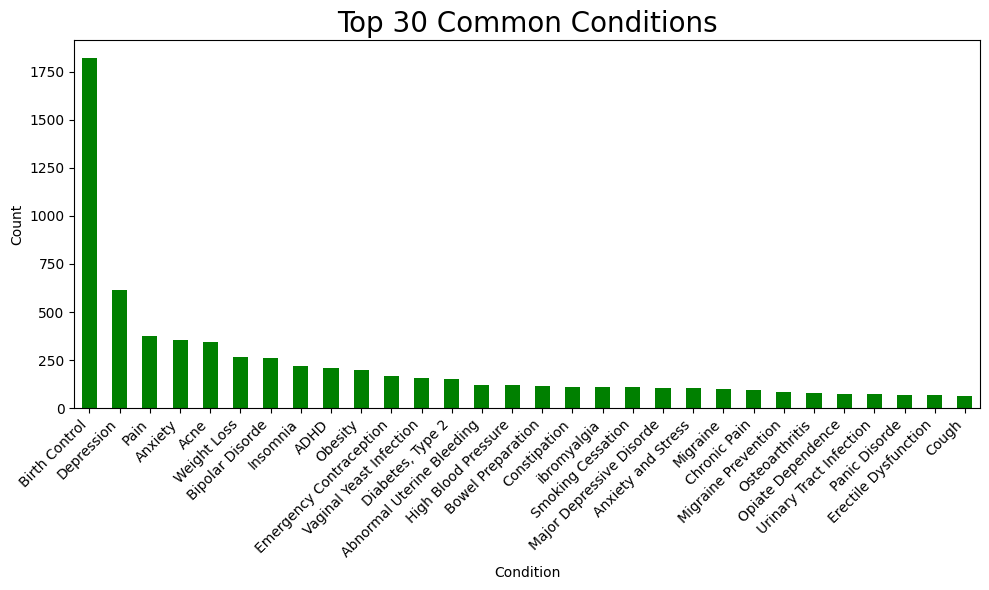

In [17]:
top_10_conditions = data_combine['condition'].value_counts().head(30)

plt.figure(figsize=(10, 6))
top_10_conditions.plot(kind='bar', color = 'green')
plt.title('Top 30 Common Conditions', fontsize = 20)
plt.xlabel('Condition')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

Pada gambar, dapat dilihat birth control mendominasi data 'condition' dengan jumlah hampir sekitar 40.000

### Top 30 Popular Drugs

In [18]:
data_combine.drugName.value_counts().head(10)

Levonorgestrel                        241
Etonogestrel                          215
Ethinyl estradiol / norethindrone     158
Nexplanon                             136
Ethinyl estradiol / norgestimate      120
Phentermine                           113
Ethinyl estradiol / levonorgestrel    111
Sertraline                             95
Escitalopram                           79
Implanon                               79
Name: drugName, dtype: int64

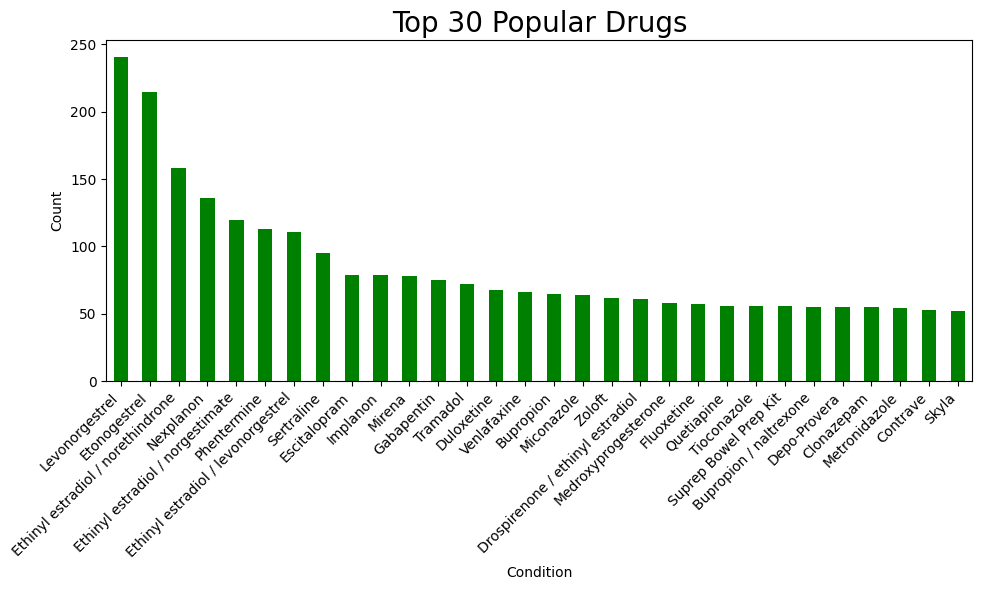

In [19]:
top_30_conditions = data_combine['drugName'].value_counts().head(30)

plt.figure(figsize=(10, 6))
top_30_conditions.plot(kind='bar', color = 'green')
plt.title('Top 30 Popular Drugs', fontsize = 20)
plt.xlabel('Condition')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

 Gambaran umum mengenai distribusi n kondisi atau penyakit tertentu. Ditemukan bahwa sebagian besar ulasan berkaitan dengan obat-obatan untuk kontrasepsi (Birth Control), depresi (Depression), dan penghilang rasa sakit (Pain), dengan jumlah ulasan yang signifikan.

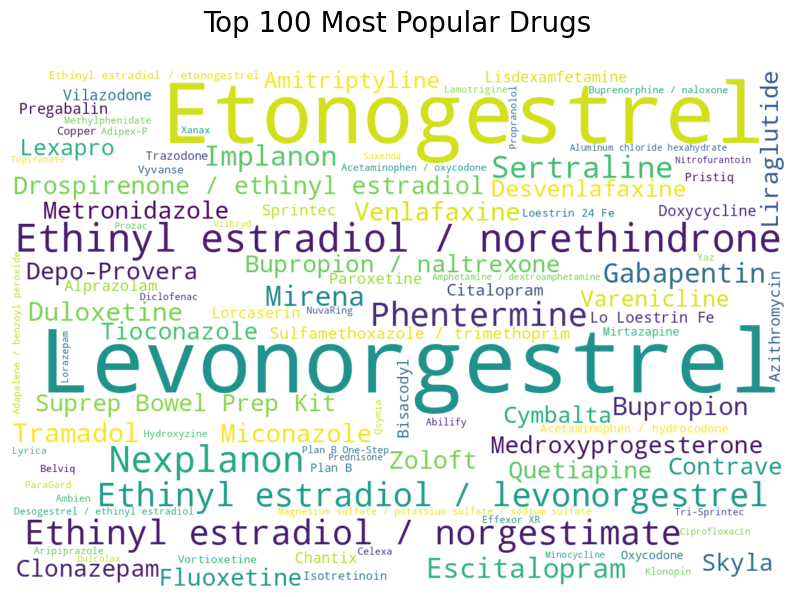

In [20]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)


# Create a WordCloud
wordcloud = WordCloud(
    stopwords = stopwords,
    background_color='white',
    width=1200,
    height=800
).generate_from_frequencies(data_combine['drugName'].value_counts().head(100))


plt.figure(figsize=(10, 10))
plt.title('Top 100 Most Popular Drugs', fontsize=20, y = 1.06)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


Jenis obat Levonorgestrel mendominasi dengan jumlah sekitar 4800-an

In [21]:
# data_combine.groupby(['condition'])['drugName'].nunique().sort_values(ascending=False).head(10)

### Mengecek jumlah variasi jenis obat untuk tiap-tiap kondisi

In [22]:
data_combine.groupby('condition')['drugName'].value_counts().groupby('condition').count().sort_values(ascending=False).head(10)

condition
Birth Control               109
Pain                         90
Depression                   75
Acne                         57
Anxiety                      48
High Blood Pressure          47
Insomnia                     44
Bipolar Disorde              44
Diabetes, Type 2             39
Major Depressive Disorde     35
Name: drugName, dtype: int64

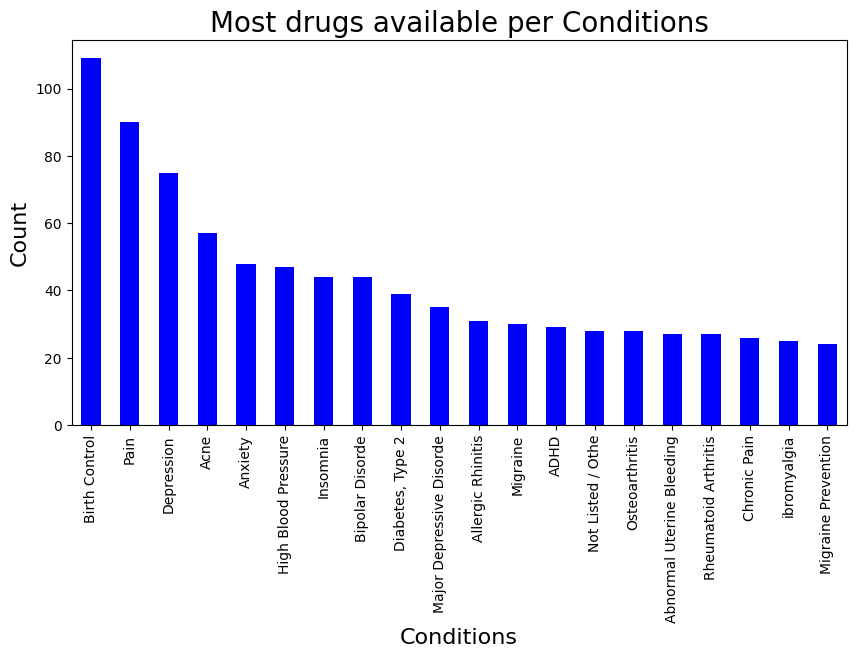

In [23]:
data_combine.groupby('condition')['drugName'].value_counts().groupby('condition').count().sort_values(ascending=False).head(20).plot.bar(figsize=(10, 5), color='blue')

plt.title('Most drugs available per Conditions', fontsize=20)
plt.xlabel('Conditions', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.show()

Menggambarkan sejumlah besar obat terfokus pada pengobatan kondisi kesehatan tertentu.

###  Mengecek jumlah suatu jenis obat yang dapat digunakan untuk berbagai kondisi

In [24]:
data_combine.groupby('drugName')['condition'].value_counts().groupby('drugName').count().sort_values(ascending=False).head(20)

drugName
Gabapentin                         15
Venlafaxine                        14
Prednisone                         13
Duloxetine                         13
Amitriptyline                      11
Zoloft                             11
Cymbalta                           11
Sertraline                         10
Quetiapine                         10
Aripiprazole                       10
Paroxetine                         10
Pregabalin                          9
Metronidazole                       9
Clonazepam                          9
Klonopin                            9
Clarithromycin                      9
Diclofenac                          9
Azithromycin                        9
Naproxen                            8
Sulfamethoxazole / trimethoprim     8
Name: condition, dtype: int64

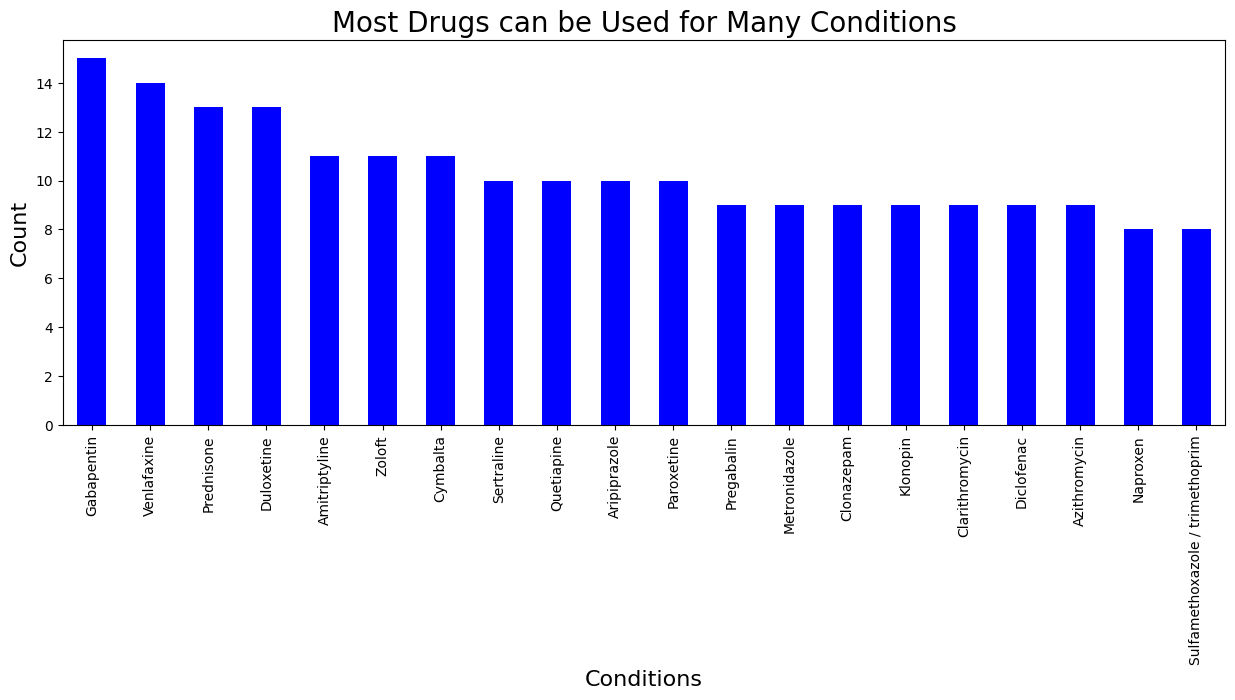

In [25]:
data_combine.groupby('drugName')['condition'].value_counts().groupby('drugName').count().sort_values(ascending=False).head(20).plot.bar(figsize=(15, 5), color='blue')

plt.title('Most Drugs can be Used for Many Conditions', fontsize=20)
plt.xlabel('Conditions', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.show()

Menjelaskan tentang jumlah obat untuk beberapa kondisi menunjukkan variasi dalam jenis obat yang digunakan untuk berbagai kondisi kesehatan

###  Melihat distribusi rating dan usefulCount pada data

<function matplotlib.pyplot.show(close=None, block=None)>

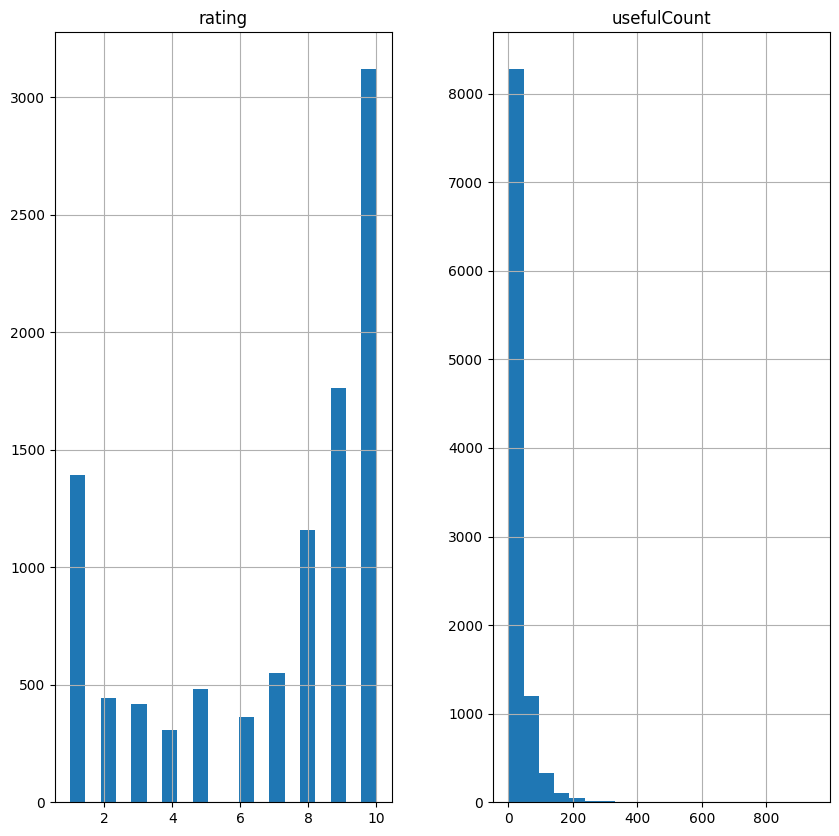

In [26]:
data_combine[['rating', 'usefulCount']].hist(bins = 20, figsize =(10,10))
plt.show

In [27]:
data_combine[data_combine['usefulCount']==949]

,uniqueID,drugName,condition,review,rating,date,usefulCount
3829,96615,Sertraline,Depression,"""I&#039;ve been on Zoloft 50mg for over two ye...",9,5-Aug-08,949


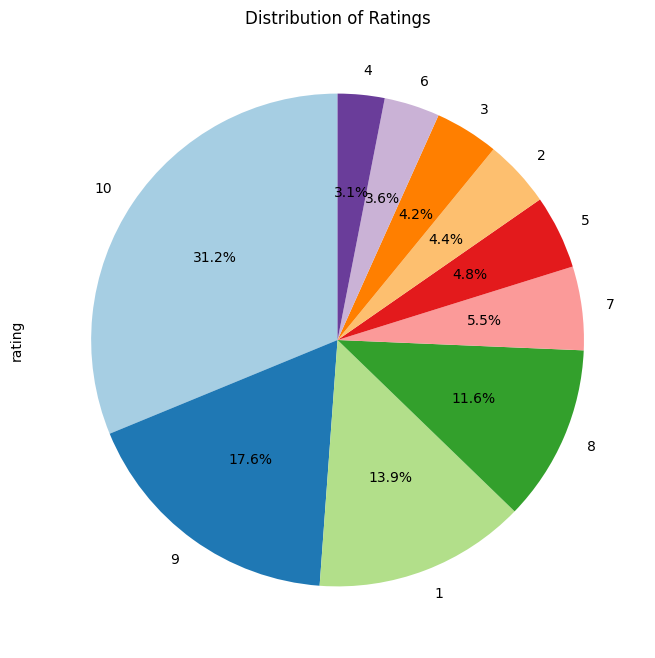

In [28]:
# Plotting a pie chart for the distribution of ratings
data_combine['rating'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, figsize=(8, 8), colors=plt.cm.Paired.colors)

plt.title('Distribution of Ratings')
plt.show()

<ipython-input-29-f5c43c4eacc6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_combine['sentiment'] = data_combine['rating'].apply(lambda x: 'Positive' if x > 5 else 'Negative')


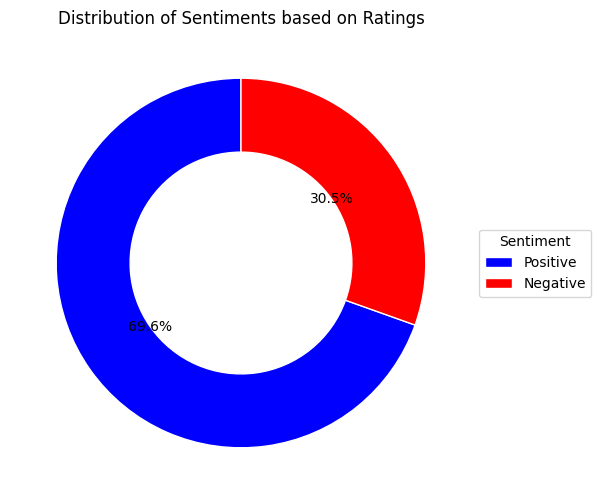

In [29]:
# Categorize ratings as positive and negative sentiment
data_combine['sentiment'] = data_combine['rating'].apply(lambda x: 'Positive' if x > 5 else 'Negative')

sentiment_counts = data_combine['sentiment'].value_counts()
colors = ['blue', 'red']

fig, ax = plt.subplots(figsize=(6, 6))
wedges, texts, autotexts = ax.pie(sentiment_counts, autopct='%1.1f%%', startangle=90, colors=colors,
                                  wedgeprops=dict(width=0.4, edgecolor='w'))

plt.title('Distribution of Sentiments based on Ratings')
ax.legend(wedges, ['Positive', 'Negative'], title='Sentiment', loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()

Distribusi sentimen positif mendominasi dengan persentase sebesar 69.6 %

# Data Preparation

## Data Cleaning

In [30]:
data_combine.isnull().sum()

uniqueID        0
drugName        0
condition      48
review          0
rating          0
date            0
usefulCount     0
sentiment       0
dtype: int64

In [31]:
data_combine = data_combine.dropna()

In [32]:
data_combine.isna().sum()

uniqueID       0
drugName       0
condition      0
review         0
rating         0
date           0
usefulCount    0
sentiment      0
dtype: int64

In [33]:
# CHECKING DUPLICATE DATA
duplicate_idx = data_combine['uniqueID'].duplicated()
duplicate_rows_id = data_combine[duplicate_idx]

print(f'Number of duplicate unique ID values: { duplicate_rows_id.shape[0]}')

Number of duplicate unique ID values: 0


In [34]:
data_combine

,uniqueID,drugName,condition,review,rating,date,usefulCount,sentiment
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22,Positive
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17,Positive
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3,Positive
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35,Positive
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4,Positive
...,...,...,...,...,...,...,...,...
9995,132278,Ativan,Insomnia,"""I was given Ativan for occasional use. I try ...",9,9-Aug-14,176,Positive
9996,126842,Erythromycin,Upper Respiratory Tract Infection,"""This antibiotic is the best, hands down. The...",10,26-Mar-16,8,Positive
9997,68153,Plan B,Emergency Contraception,"""I took this pill on June 16th 2015. I was rea...",10,12-Aug-15,2,Positive
9998,126865,Dilaudid,Pain,"""I developed severe pancreatitis and hepatitis...",10,2-Feb-10,58,Positive


In [36]:
len(data_combine['uniqueID'].unique())

9952

## Konversi Data Series ke List

In [37]:
unique_id = data_combine['uniqueID'].to_list()
drug_name = data_combine['drugName'].to_list()
condition = data_combine['condition'].to_list()

In [38]:
len(unique_id),len(drug_name), len(condition)

(9952, 9952, 9952)

#### Membuat dataframe

In [39]:
drug_data_new = pd.DataFrame({
    'id':unique_id,
    'drug_name':drug_name,
    'condition':condition
})

drug_data_new

,id,drug_name,condition
0,163740,Mirtazapine,Depression
1,206473,Mesalamine,"Crohn's Disease, Maintenance"
2,159672,Bactrim,Urinary Tract Infection
3,39293,Contrave,Weight Loss
4,97768,Cyclafem 1 / 35,Birth Control
...,...,...,...
9947,132278,Ativan,Insomnia
9948,126842,Erythromycin,Upper Respiratory Tract Infection
9949,68153,Plan B,Emergency Contraception
9950,126865,Dilaudid,Pain


In [40]:
data = drug_data_new
data.sample(5)

,id,drug_name,condition
8056,206555,Valsartan,High Blood Pressure
1571,66912,Seroquel,Depression
8886,173819,Provigil,Shift Work Sleep Disorde
888,58183,Acetaminophen / hydrocodone,Pain
1751,36062,Efinaconazole,"Onychomycosis, Toenail"


In [41]:
df = pd.DataFrame(data)

# Check for duplicate rows based on both "drug_name" and "condition"
df_no_duplicates = df.drop_duplicates(subset=['drug_name', 'condition'])

In [42]:
df_no_duplicates

,id,drug_name,condition
0,163740,Mirtazapine,Depression
1,206473,Mesalamine,"Crohn's Disease, Maintenance"
2,159672,Bactrim,Urinary Tract Infection
3,39293,Contrave,Weight Loss
4,97768,Cyclafem 1 / 35,Birth Control
...,...,...,...
9912,11119,Drospirenone / ethinyl estradiol / levomefolat...,Polycystic Ovary Syndrome
9919,22872,Candesartan,Migraine Prevention
9927,171172,Lessina,Birth Control
9933,115132,Diazepam,Seizures


In [43]:
data_merged = df_no_duplicates.groupby('drug_name')['condition'].agg(lambda x: ', '.join(x)).reset_index()

In [44]:
data_merged.tail(10)

,drug_name,condition
1497,Zyban,Smoking Cessation
1498,Zyclara,Keratosis
1499,Zyprexa,"Depression, Bipolar Disorde, Major Depressive ..."
1500,Zyprexa Zydis,Paranoid Disorde
1501,Zyrtec,"Urticaria, Allergic Rhinitis"
1502,Zyrtec-D,4</span> users found this comment helpful.
1503,Zytiga,Prostate Cance
1504,Zyvox,Bacteremia
1505,ella,Emergency Contraception
1506,femhrt,"Menstrual Disorders, Postmenopausal Symptoms"


In [45]:
data_merged[data_merged['drug_name'] == 'Mirtazapine']

,drug_name,condition
893,Mirtazapine,"Depression, Insomnia, Post Traumatic Stress Di..."


# Modelling - Content Based Filtering

## TF-IDF Vectorizer

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi TfidfVectorizer
tf = TfidfVectorizer()

tf.fit(data_merged['condition'])

tf.get_feature_names_out()

array(['10', '11', '12', '13', '15', '16', '17', '24', '25', '31', '33',
       '39', 'abnormal', 'abortion', 'abscess', 'acial', 'acid', 'acne',
       'actinic', 'active', 'acuminata', 'acute', 'adhd', 'adjunct',
       'adjuvant', 'after', 'aggregation', 'agitated', 'alcohol',
       'allergic', 'allergies', 'alopecia', 'alpha', 'alzheimer',
       'amenorrhea', 'anal', 'and', 'androgenetic', 'anemia',
       'anesthesia', 'angina', 'angioedema', 'angle', 'ankylosing',
       'anorexia', 'anxiety', 'apnea', 'arrhythmia', 'arthritis',
       'associated', 'asthma', 'atigue', 'atopic', 'atrial', 'atrophic',
       'attack', 'auditory', 'augmentation', 'aureus', 'autism',
       'autoimmune', 'b12', 'back', 'bacteremia', 'bacterial', 'barrett',
       'basal', 'benign', 'benzodiazepine', 'biliary', 'binge', 'bipolar',
       'birth', 'bite', 'bladde', 'bladder', 'bleeding', 'blood', 'bone',
       'borderline', 'bowel', 'breakthrough', 'breast', 'bronchitis',
       'bronchospasm', 'bu

In [47]:
# Melakukan fit  transformasi ke bentuk matrix
tfidf_matrix = tf.fit_transform(data_merged['condition'])

#melihat ukuran matrix tfidf
tfidf_matrix.shape

(1507, 608)

In [48]:
# Mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()
tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [49]:
# Membuat dataframe untuk melihat tf-idf matrix

# Making dataset from list with index and column names
a = pd.DataFrame(
    tfidf_matrix.todense(),
    columns = tf.get_feature_names_out(),
    index = data_merged.drug_name
)

a.sample(15, axis=1).sample(15, axis=0)

,generalized,reflex,depression,12,vein,anorexia,nasal,cell,disorders,deficiency,male,sclerosis,mineral,fissure,embolism
drug_name,,,,,,,,,,,,,,,
Aprepitant,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
MetroCream,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
Zenatane,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
Multivitamin with minerals,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.450843,0.0,0.0,0.510569,0.0,0.0
Propoxyphene,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
Prazosin,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
Apixaban,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
Patanase,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
Telmisartan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0


# Cosine Similiarity

In [50]:
tfidf_matrix.todense().shape

(1507, 608)

In [51]:
from sklearn.metrics.pairwise import cosine_similarity

#Menghitung cosine similiarity pada matrix tf-idf
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [52]:
cosine_sim.shape

(1507, 1507)

In [66]:
# Membuat dataframe dari variabel cosine_sim dengan baris kolom berupa nama obat
cosine_sim_df = pd.DataFrame(cosine_sim, index= data_merged['drug_name'], columns = data_merged['drug_name'])
print('Shape: ', cosine_sim_df.shape)

# Melihat similarty matrix pada setiap obat
cosine_sim_df.sample(10, axis=1).sample(10,axis=0)

Shape:  (1507, 1507)


drug_name,Desvenlafaxine,Clindesse,Claritin-D,Aspirin / dipyridamole,Mysoline,Denavir,Tofacitinib,Telmisartan,Demerol,Estraderm
drug_name,,,,,,,,,,
Prazosin,0.153315,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Xyrem,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Efavirenz / emtricitabine / tenofovir,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Tioconazole,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Aranesp,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Moxatag,0.000000,0.322599,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Qsymia,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Hydrochlorothiazide,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Chlorpheniramine / hydrocodone / pseudoephedrine,0.000000,0.000000,0.555053,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
def drug_recommendations(drug_name, similarity_data=cosine_sim_df, items=data_merged[['drug_name', 'condition']], k=5):

    # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan
    # Dataframe diubah menjadi numpy
    # Range(start, stop, step)
    index = similarity_data.loc[:,drug_name].to_numpy().argpartition(
        range(-1, -k, -1))

    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]

    # Drop nama_resto agar nama resto yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(drug_name, errors='ignore')

    return pd.DataFrame(closest).merge(items).head(k)

In [55]:
drug_recommendations('Abilify Discmelt')

,drug_name,condition
0,Emsam,Depression
1,Tofranil,Depression
2,St. john's wort,Depression
3,Parnate,Depression
4,Amoxapine,Depression


# Evaluation

In [56]:
drug_recommendation = drug_recommendations('Abilify Discmelt')

In [57]:
drug_name = data_merged[data_merged['drug_name']=='Abilify Discmelt']

In [58]:
drug_name

,drug_name,condition
4,Abilify Discmelt,Depression


In [59]:
match_condition = 0
for i in range (5):
  if drug_recommendation['condition'][i] == drug_name.iloc[0]['condition']:
    match_condition +=1

In [60]:
match_condition

5

In [61]:
Accuracy = match_condition/5*100
print("Accuracy of the model is", Accuracy,'%')

Accuracy of the model is 100.0 %


Dalam tabel hasil , kita memiliki rekomendasi obat untuk kondisi "Depression" berdasarkan obat sebelumnya yang dikonsumsi, yaitu "Abilify Discmelt." Dapat dilihat sistem memberikan rekomendasi yang sepenuhnya sesuai dengan kondisi "Depression" dan obat sebelumnya tersebut, maka kita memiliki presisi 100%